In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.sparse import diags
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
plt.rcParams.update({'font.size': 14})

In this notebook the diffusion equation/heat equation is solved implicit and explicit.

## $$
\frac{\partial u}{\partial t}= - \frac{\partial A \cdot u}{\partial x} +  \frac{\partial^2 B \cdot u}{\partial x^2} 
$$

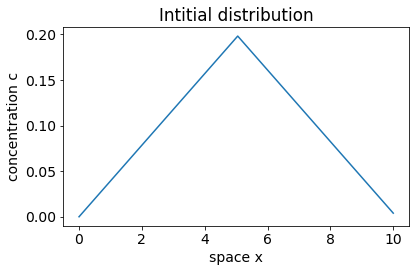

In [4]:
Nx = 100                     #x steps
Nt = 2000                    #t steps
L = 10                       #Length of the domain ([0,L])
T = 10                        #Stop time of the simulation
#Remark T should be smaller Nt/200 to get resonable results for the explicit method
# F < 1/2
D = 1                        #Diffusion coefficient

x = np.linspace(0, L, Nx)    #x space   
t = np.linspace(0, T, Nt)    #t space
dt = t[1]-t[0]               #t step
dx = x[1] - x[0]             #x step
A = 1
B = 1

#Creates a triangle function as initial distribution
def initf(x,Nx):
    mini = 1
    maxi = 2
    ini = np.zeros(Nx)
    for i in range(int(Nx/2)): 
        ini[i] = -(mini-maxi)/int(Nx/2)*i
        ini[i+int(Nx/2)] = (mini-maxi)/int(Nx/2)*i+mini
    ini /= sum(ini)*dx
    return ini#

def plotresult(x,c,Darray,title):
    colorwave = cm.plasma(np.linspace(0, 1, Nt))
    fig=plt.figure(1, figsize = (15,5) )
    host = plt.subplot(1,2,1)
    par1 = host.twinx()
    color1 = 'orange'
    color2 = 'blue'
    host.set_xlabel('space x')
    host.set_ylabel('initial concentration', color=color1)
    par1.set_ylabel('Diffusion coefficient', color=color2)
    host.tick_params('y', colors=color1)
    par1.tick_params('y', colors=color2)
    p1 = host.plot(x,c[:,0],color=color1)
    p2 = par1.plot(x,Darray,color=color2)
    plt.title('Initial conditions')
    
    ax2 = plt.subplot(1,2,2)
    for i in range(Nt):
        if i % 100 == 0:
            plt.plot(x,c[:,i],c=colorwave[i])
            plt.xlabel('space x')
            plt.ylabel('concentration c')
            plt.title(str(title))
    plt.title('Time evolution')
    plt.tight_layout()  
    plt.savefig(str(title)+'.svg', format='svg')
    plt.show()

binitial = initf(x,Nx)              #initial distribution         

plt.plot(x,binitial)           #Plot the initial distribution
plt.title('Intitial distribution')
plt.xlabel('space x')
plt.ylabel('concentration c')
plt.tight_layout()  
plt.show()

# Explicit method - Forward Euler scheme
http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/sphinx/._main_diffu001.html#forward-euler-scheme

Space and time are descretized into:

### $x_{i}=i \Delta x, \: \: \: i = 0,...,N_x$
### $t_{n}=n \Delta t, \: \: \: n = 0,...,N_t$.

$u_i^n$ denotes the mesh function that approximates $u(x_i,t_n)$. The diffusion equation now needs to be fulfilled at every mesh point $(x_i,t_n)$. This leads to the equation:

### $\frac{\partial }{\partial t} u\left ( x_{i},t_{n} \right ) = -\frac{\partial A \cdot u\left ( x_{i},t_{n} \right )}{\partial x} + \frac{\partial^2 }{\partial x^2} B \cdot u\left ( x_{i},t_{n} \right )$.

The derivatives are now replaced by finite difference approximations. The simplest method is to use forward difference in time and a central difference in space (which is equivalent to first perform forward difference and than backward difference in space):

### $\left [ D^{+}_{t}u=-A D_{x}^{+} u + B D_{x}^{-} D_{x}^{+}u \right ]^{n}_{i}$.

This can be written as:

### $\frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = -A \frac{u^{n}_{i+1}-u^{n}_{i}}{\Delta x} + B\frac{u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}}{\Delta x^2}$

and than rearranged for $u^{n+1}_{i}$:

### $u^{n+1}_{i}=u^{n}_{i} + \frac{\Delta t}{\Delta  x} \left ( -A \left ( u^{n}_{i+1}-u^{n}_{i} \right )+B \frac{u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}}{\Delta x} \right )$,

Rearange:

### $u^{n+1}_{i}=u^{n}_{i+1} \left ( - \frac{A \Delta t}{\Delta  x} +  \frac{B \Delta t}{\Delta  x^{2}}\right ) + u^{n}_{i} \left ( 1+ \frac{A \Delta t}{\Delta  x^{2}} -  \frac{2B \Delta t}{\Delta  x^{2}} \right )+ u^{n}_{i-1} \frac{B \Delta t}{\Delta  x^{2}}$

In [10]:
A = 0.5
B = 1

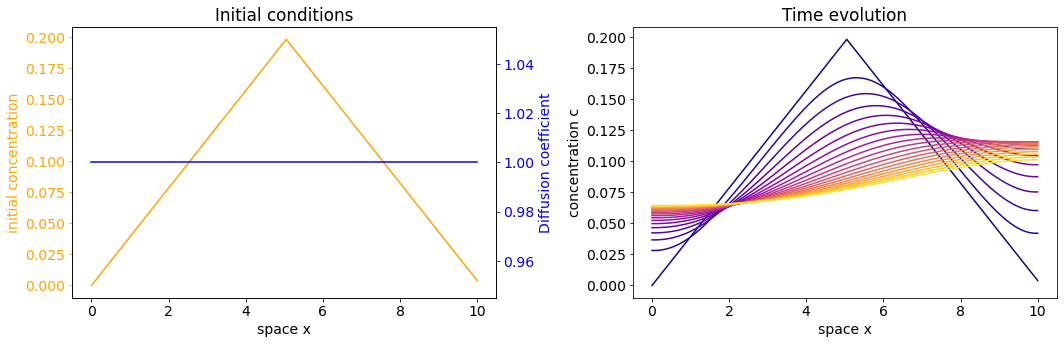

In [12]:
c = np.zeros((Nx,Nt))        #array to save the density distributions
c[:,0] = binitial

for n in range(Nt-1):
    for i in range(1,Nx-1):
        c[i,n+1] = c[i+1,n] * (-A*dt/dx + B*dt/dx**2) + c[i,n] * (1 + A*dt/dx - 2*B*dt/dx**2) + c[i-1,n] * B*dt/dx**2
    c[0,n+1] =  c[1,n+1]#c[1,0]#
    c[-1,n+1] =  c[-2,n+1]#c[-1,0]#
    #c[:,n+1] /= sum(c[:,n+1]*dx)
    
    
Darray = D*np.ones(Nx)
plotresult(x,c,Darray,'Explicit Solution')